# What drives the price of a car?

![]( /Users/jaikumar/Desktop/used_car_selection/images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = /Users/jaikumar/Desktop/used_car_selection/images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Objective of the business problem**: Determine the factors that influence used car prices.
* Understand what factors make a car more or less expensive and provide clear recommendations to the client as to what consumers value in a used car and to finetune their inventory.

**Scope of the project**: Analyze a dataset of 426K used cars to identify key features affecting price points.

**Project stakeholders**: The client is the used car dealership seeking insights.

Some of the questions that the model can help answer for the stakeholders are
* What are the most common vehicle types?
* Which brands are predominant in the used cars market?
* What is the average age of cars on the used cars market?
* Does location change the value of the car?
* Concerning motorization: what model, condition, cylinder, etc determine customer inflection points?
* Any concerns based on odometer readings and customer mindset?
* Can a car value be predicted by using features from the dataset

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [9]:
import numpy as np # linear algebra
from math import sqrt
import pandas as pd # pandas 
import matplotlib.pyplot as plt # matplotlib
import seaborn as sns # seaborn 
import plotly.express as px # plotly
from plotly.subplots import make_subplots
pd.set_option('display.max_columns', None)

# For modeling and running regressions 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [10]:
# Reading the dataset and converting it to a panda DataFrame for analysis 
df = pd.read_csv('/Users/jaikumar/Desktop/used_car_selection/data/vehicles.csv')

In [11]:
# Data Understanding and Analysis
print('-'*50)
print(' '*20,'Data head and describe')
print('-'*50,'\n')
print(df.head())
print(df.describe())

print('-'*50)
print(' '*20,'Data info and shape')
print('-'*50,'\n')
print(df.info())
print(df.shape)

print('-'*50)
print(' '*20,'Data columns')
print('-'*50,'\n')
Total_cols = df.shape[0]
print (Total_cols)
print (df.columns)

--------------------------------------------------
                     Data head and describe
-------------------------------------------------- 

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN  

--------------------------------------------------
                     Data Missing counts
-------------------------------------------------- 

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


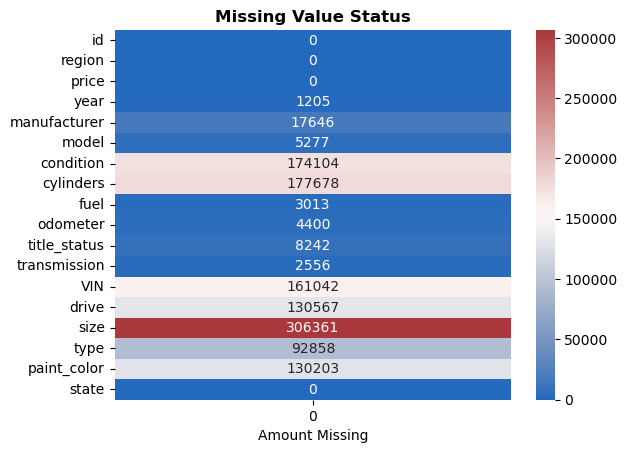

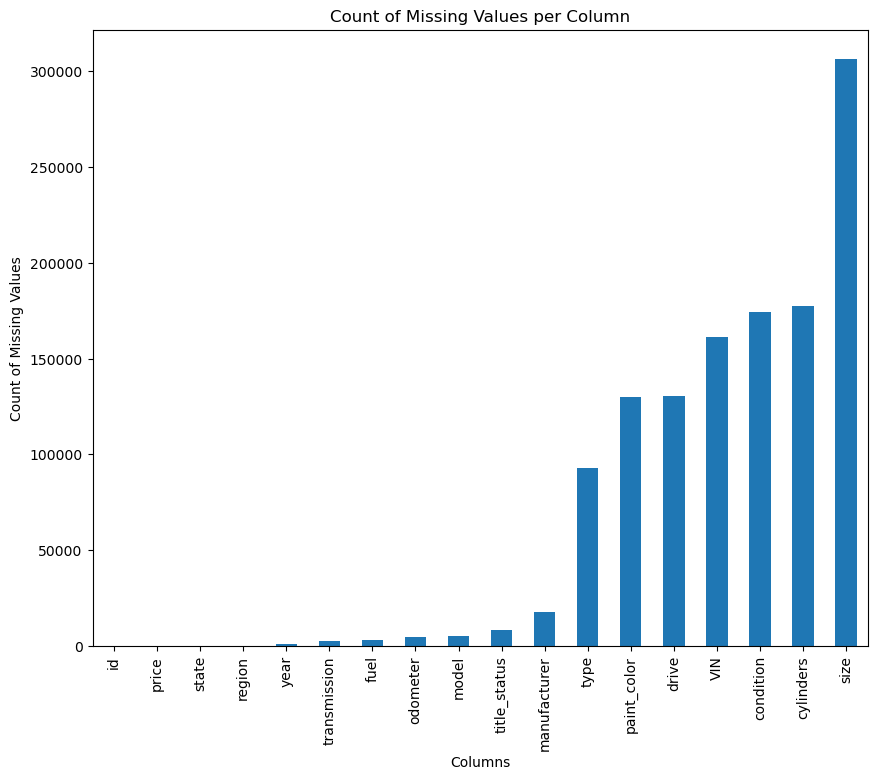

In [12]:
# Data Understanding and Analysis - Check for missing values
print('-'*50)
print(' '*20,'Data Missing counts')
print('-'*50,'\n')
print(df.isna().sum())

plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

# Data Cleanup - Check for other missing values
missing_counts = df.isnull().sum()

# 2. Sort the counts
sorted_counts = missing_counts.sort_values()

# 3. Create the bar plot
plt.figure(figsize=(10, 8))
sorted_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values per Column')
plt.show()

In [13]:
# dropping columns that I feel are irrelevant to the Analysis
df.drop(['id', 'VIN', 'size'], axis=1, inplace=True)
df['year'] = 2024-df['year']
df = df.dropna(subset=['year', 'odometer'])
df.fillna('n/a', inplace=True)

In [14]:
# looking at condition, type and paint_color
print('-'*50)
print(' '*20,'Value counts for condition, type and paint_color')
print('-'*50,'\n')
print(df['condition'].value_counts())
print(df['type'].value_counts())
print(df['paint_color'].value_counts())

--------------------------------------------------
                     Value counts for condition, type and paint_color
-------------------------------------------------- 

condition
n/a          170493
good         121235
excellent     99765
like new      21178
fair           6769
new            1303
salvage         601
Name: count, dtype: int64
type
n/a            91782
sedan          85760
SUV            76066
pickup         42686
truck          35231
other          21698
coupe          18986
hatchback      16505
wagon          10649
van             8423
convertible     7659
mini-van        4773
offroad          609
bus              517
Name: count, dtype: int64
paint_color
n/a       128090
white      78268
black      62017
silver     42481
blue       30925
red        30163
grey       24086
green       7295
custom      6699
brown       6553
yellow      2119
orange      1970
purple       678
Name: count, dtype: int64


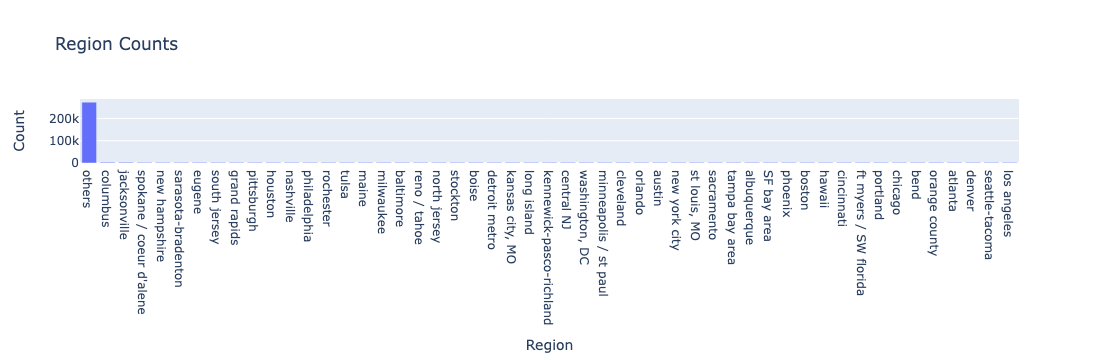

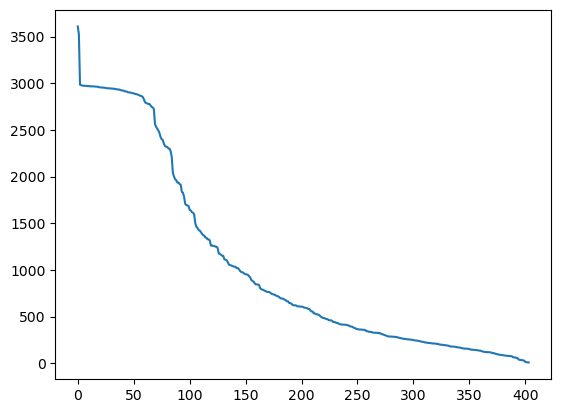

In [15]:
df.columns

# look at the regions in the data 
rg = df['region'].value_counts()
df['region'] = df['region'].apply(lambda s: s if str(s) in rg[:50] else 'others')
plt.plot(range(len(rg)), rg)

region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

fig = px.bar(region_counts, x='Region', y='Count', title='Region Counts')
fig.show()

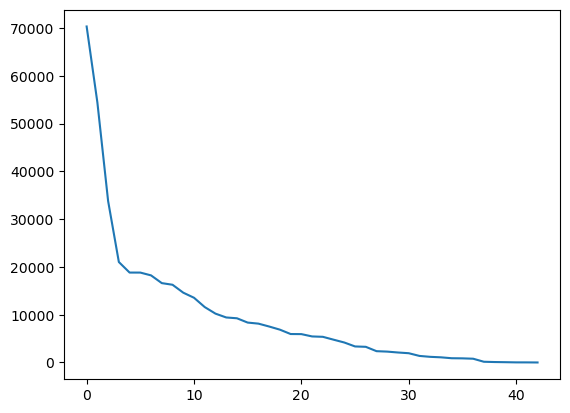

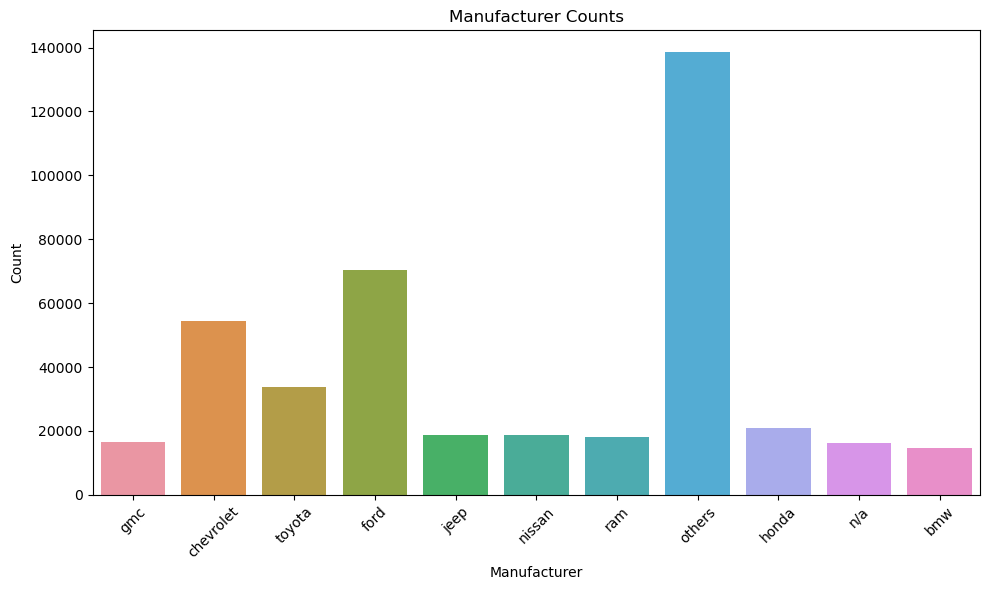

In [16]:
# look at the manufacturers 
mf = df['manufacturer'].value_counts()
plt.plot(range(len(mf)), mf)
df['manufacturer'] = df['manufacturer'].apply(lambda s: s if str(s) in mf[:10] else 'others')
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(x='manufacturer', data=df)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Manufacturer Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure proper spacing
plt.show()

In [17]:
# look at the models 
md = df['model'].value_counts()
print('-'*50)
print(' '*20,'Value counts for Model')
print('-'*50,'\n')
print (md)
df['model'] = df['model'].apply(lambda s: s if str(s) in md[:50] else 'others')
#print (df['model'])

--------------------------------------------------
                     Value counts for Model
-------------------------------------------------- 

model
f-150                                        7870
n/a                                          5195
silverado 1500                               5043
1500                                         4178
camry                                        3070
                                             ... 
es 250                                          1
1998 Mack                                       1
f-550 service truck under deck compressor       1
terraza.                                        1
Paige Glenbrook Touring                         1
Name: count, Length: 29220, dtype: int64


In [18]:
# get the value counts for all the data columns
for i in df.columns:
  print(i, len(df[i].value_counts().index))

region 51
price 15508
year 113
manufacturer 11
model 51
condition 7
cylinders 9
fuel 6
odometer 104630
title_status 7
transmission 4
drive 4
type 14
paint_color 13
state 51


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

66858.5500000001 700.0
280000.0 7526.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



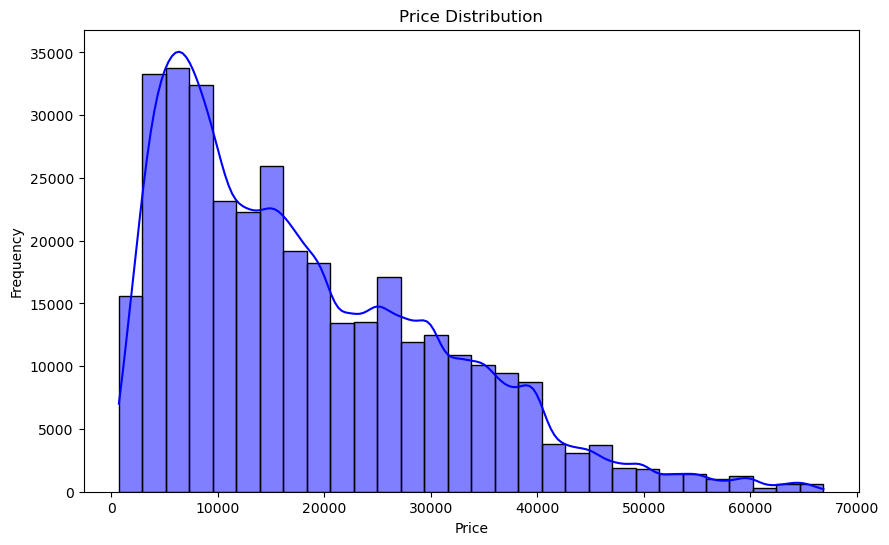

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



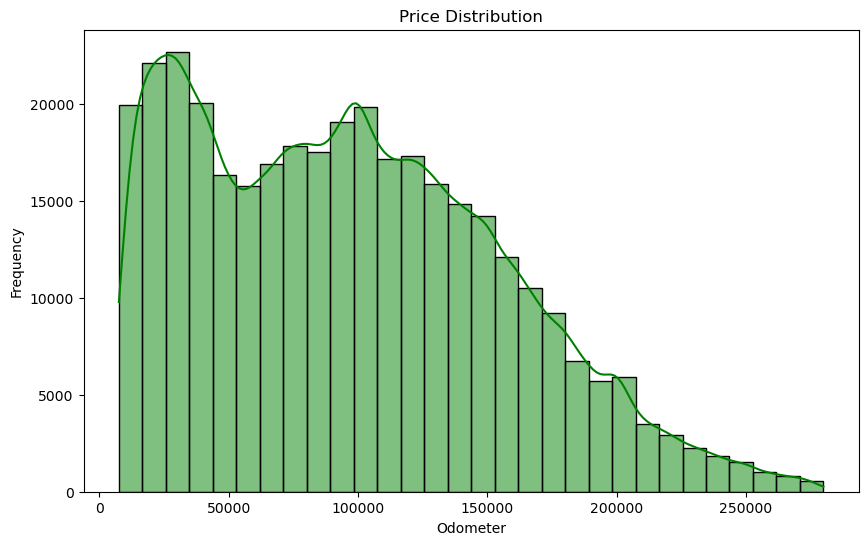

In [19]:
# Data cleaning  - for numerical values 
df.describe()

# exclude the tails from the outliers for price and odometer reading 
price_high = df['price'].quantile(0.99)
price_low = df['price'].quantile(0.1)
print(price_high, price_low)
df = df[(df['price']<price_high) & (df['price']>price_low)]

odo_high= df['odometer'].quantile(0.99)
odo_low= df['odometer'].quantile(0.05)
print(odo_high, odo_low)
df = df[(df['odometer']<odo_high) & (df['odometer']>odo_low)]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(df['odometer'], bins=30, kde=True, color='green')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [20]:
df.describe()
df.shape

(352263, 15)

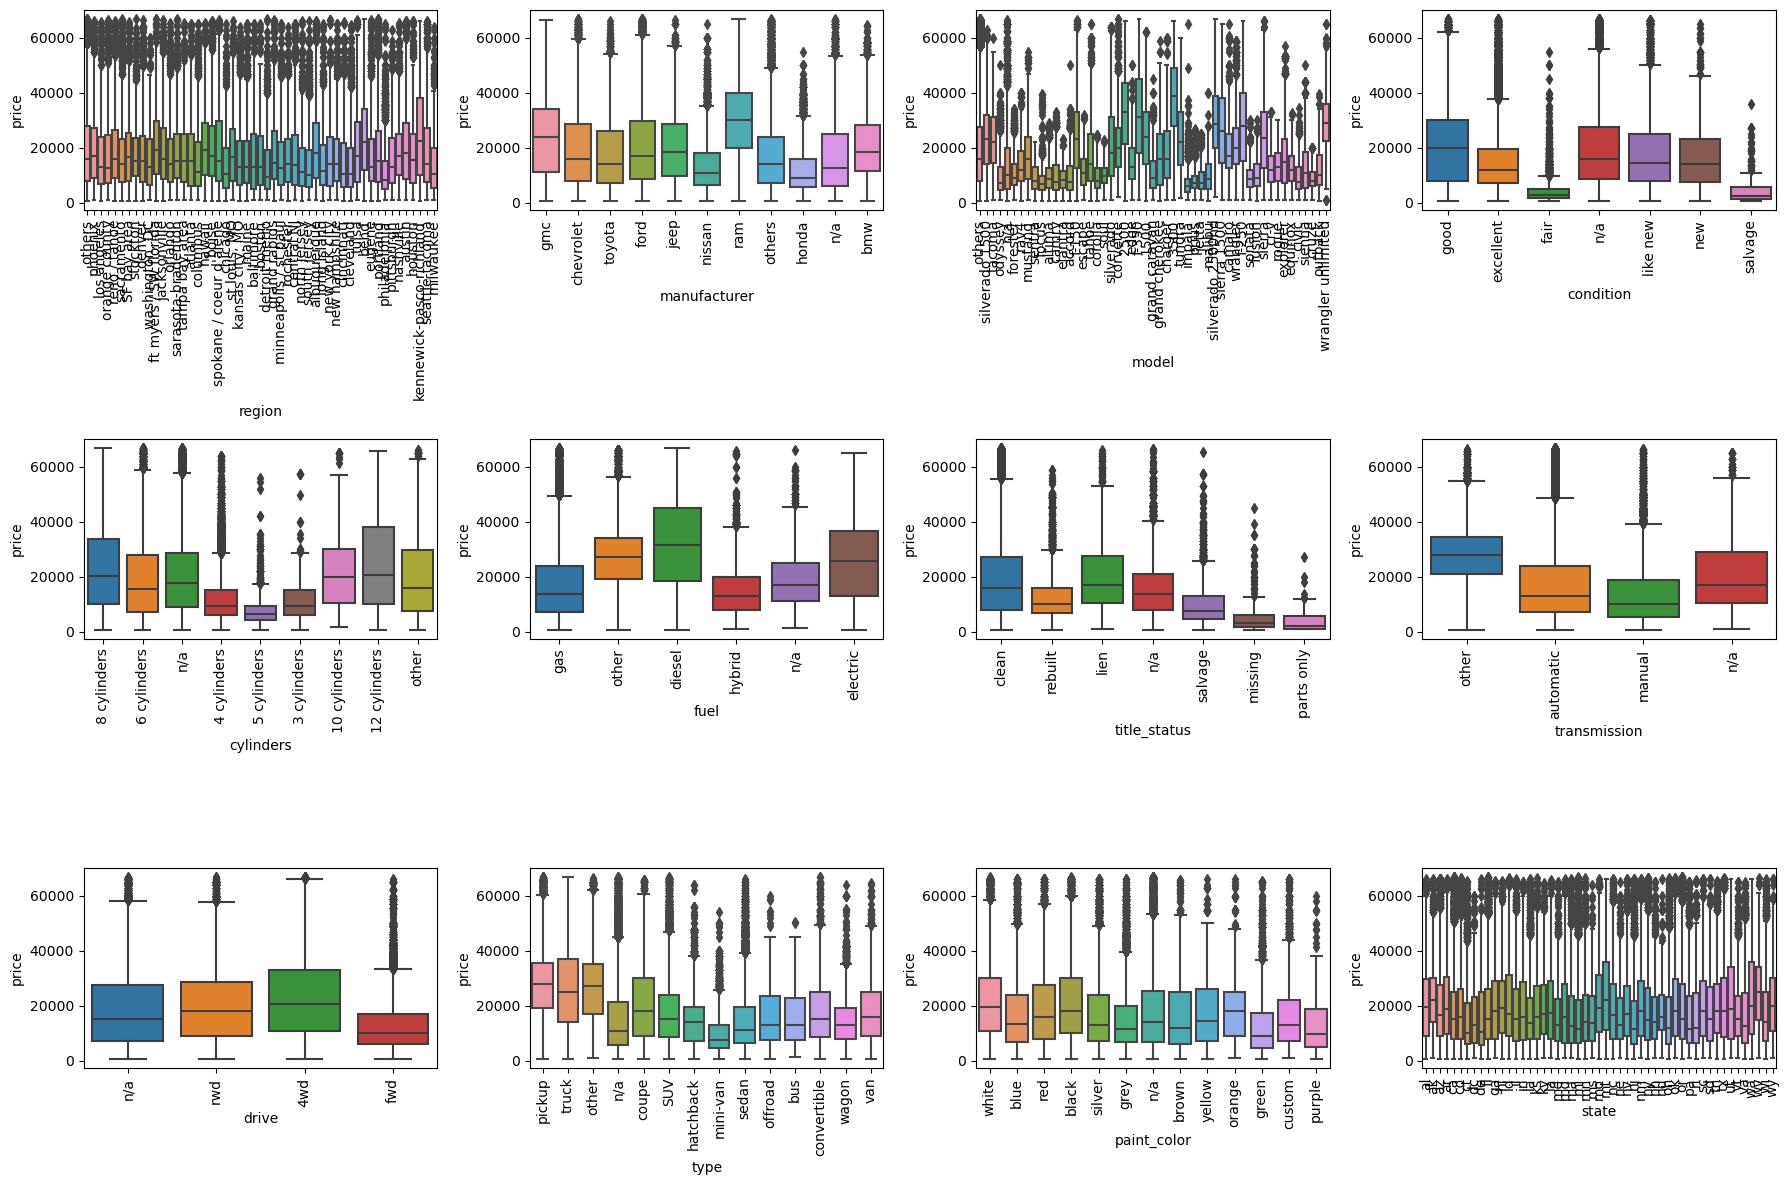

In [21]:
# data visualization - bivariate plots 

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

# Features to plot
features = ['region', 'manufacturer', 'model', 'condition', 'cylinders',
            'fuel', 'title_status', 'transmission', 'drive', 'type',
            'paint_color', 'state']

# Plot each feature against price
for i, feature in enumerate(features):
    row, col = divmod(i, 4)
    sns.boxplot(data=df, x=feature, y='price', ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

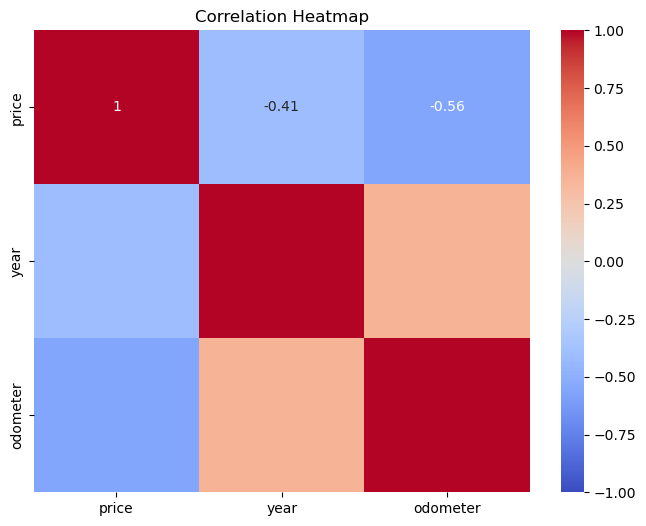

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



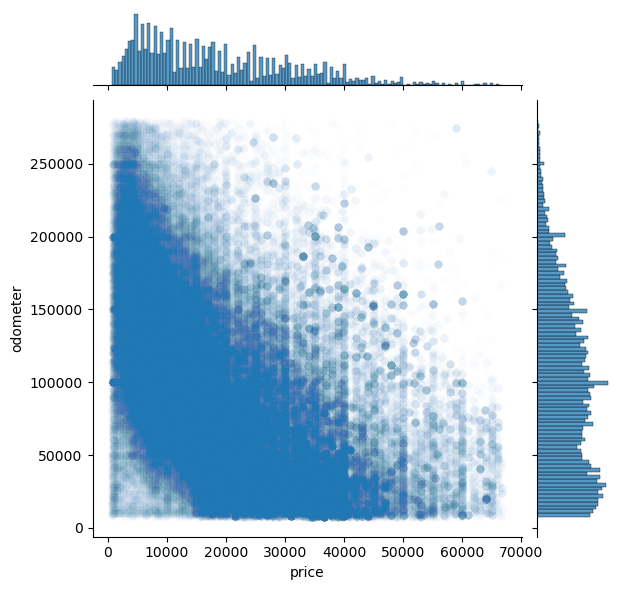

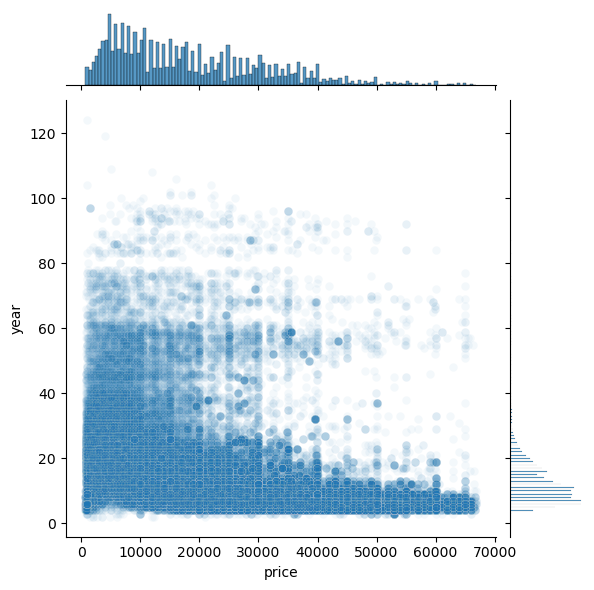

In [22]:
# numerical data correlation 
Num_columns = ['price', 'year', 'odometer']
Num_df = df[Num_columns]
plt.figure(figsize=(8, 6))
sns.heatmap(Num_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

sns.jointplot(data=df, x='price', y='odometer', alpha=0.01)
sns.jointplot(data=df, x='price', y='year', alpha=0.05)


In [23]:
# Data preprocessing for num and category types
df_num = df[['odometer', 'year']]
df_cat = df.drop(['odometer', 'year', 'price'], axis=1)

In [24]:
# use standard scalar and label encoder 
for i in df_cat.columns:
  le = LabelEncoder()
  df_cat[i] = le.fit_transform(df_cat[i])

In [25]:
scaler = StandardScaler()
scaler.fit(df_num)
df_scaled = scaler.transform(df_num)
df_scaled = pd.DataFrame(df_scaled, index=df_num.index, columns=df_num.columns)
X = pd.concat([df_scaled, df_cat], axis=1)
y = df['price']

In [26]:
print(X.head())
print(y)


    odometer      year  region  manufacturer  model  condition  cylinders  \
27 -0.661411 -0.340863      34             3     32          2          6   
28 -0.435222  0.119469      34             1     42          2          6   
29 -1.320342 -1.031361      34             1     32          2          6   
30 -0.946976 -0.686112      34            10     32          2          6   
31  0.529826 -0.225780      34             2     32          0          5   

    fuel  title_status  transmission  drive  type  paint_color  state  
27     2             0             3      2     9           11      1  
28     2             0             3      2     9            1      1  
29     2             0             3      2     9            9      1  
30     2             0             3      2     9            9      1  
31     2             0             0      3    11            0      1  
27        33590
28        22590
29        39590
30        30990
31        15000
          ...  
426874   

In [27]:
# check if there are still any NA's left 
X.isna().sum()

odometer        0
year            0
region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [28]:
# build the test and train datasets to start the modeling 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
print (X_test.head())

        odometer      year  region  manufacturer  model  condition  cylinders  \
44733   0.070174 -0.686112      34             9     32          4          5   
335133  0.291960 -0.340863      35             8     32          2          3   
353289 -0.278220 -0.110697      34             0     32          2          7   
111492 -0.847957 -0.225780      34             2     13          4          5   
209700  1.552042  0.579800      34             4     32          2          3   

        fuel  title_status  transmission  drive  type  paint_color  state  
44733      2             0             0      1     8           11      4  
335133     2             0             0      1    10            5     38  
353289     5             0             3      2     3            0     42  
111492     2             0             0      1     0            9      9  
209700     2             0             0      0     0            1     22  


Ridge (alpha=0.01) - Mean Squared Error: 91693204.3326
Ridge (alpha=0.10) - Mean Squared Error: 91693204.3596
Ridge (alpha=1.00) - Mean Squared Error: 91693204.6305
Ridge (alpha=10.00) - Mean Squared Error: 91693207.4218


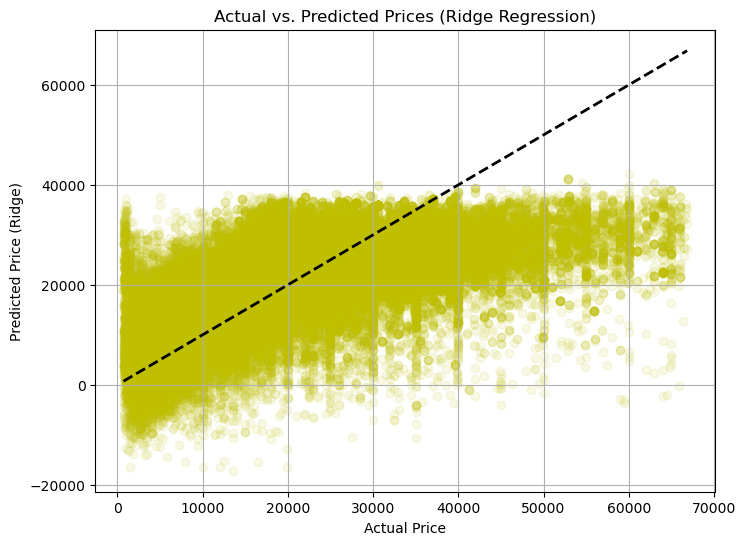

In [30]:
# Build Ridge regression models with different alpha values
alphas = [0.01, 0.1, 1.0, 10.0]  # Experiment with different regularization strengths

for alpha in alphas:
    ridge_model = make_pipeline(Ridge(alpha=alpha))
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Ridge (alpha={alpha:.2f}) - Mean Squared Error: {mse:.4f}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='y', alpha=0.10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Ridge)")
plt.title("Actual vs. Predicted Prices (Ridge Regression)")
plt.grid(True)
plt.show()

Ridge Regression (RR):
RR is an adaptation of the popular linear regression algorithm.
It enhances regular linear regression by slightly changing its cost function.
The goal is to find a balance between fitting the data well and avoiding overfitting.

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('model', Ridge(alpha=0.1))])
Ridge Regression - MSE: 42950293.91, MAE: 4543.76, R2 Score: 0.74


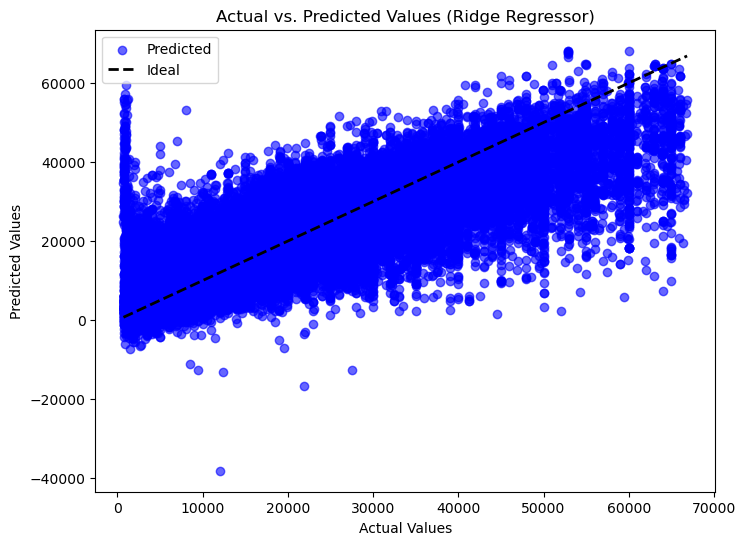

odometer: 0.2131
year: 0.3918
region: 0.0015
manufacturer: 0.0229
model: 0.0138
condition: 0.0202
cylinders: 0.1066
fuel: 0.1413
title_status: 0.0177
transmission: 0.0346
drive: 0.1237
type: 0.0225
paint_color: 0.0046
state: 0.0032


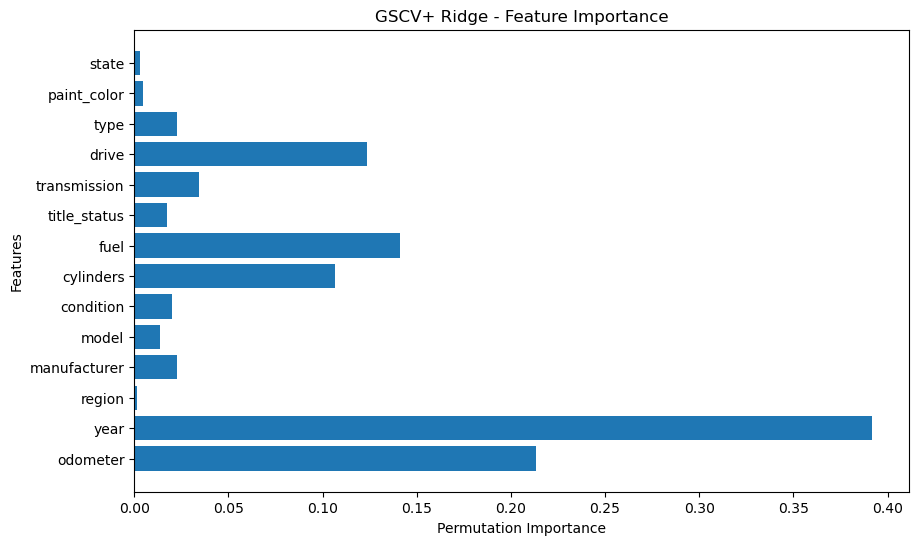

In [32]:
# Model1:  Ridge Regression with Pipeline and GridSearchCV
# Creating a pipeline that includes polynomial features, scaling, and ridge regression models. 
# Ridge regression adds an L2 penalty to linear regression, encouraging smaller coefficient values
# Create a pipeline with polynomial features and Ridge regression
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),  # You can adjust the degree
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

# Define hyperparameters for Ridge regression
param_grid = {'model__alpha': [0.01, 0.1, 1.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = grid_search.best_estimator_
print(best_ridge_model)

# Predictions on test set
y_pred_ridge = best_ridge_model.predict(X_test)

# Model evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge:.2f}, MAE: {mae_ridge:.2f}, R2 Score: {r2_ridge:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='b', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Ridge Regressor)')
plt.legend()
plt.show()

# Compute permutation importance
perm_importance = permutation_importance(best_ridge_model, X_test, y_test, n_repeats=10, random_state=1)
feature_importance = perm_importance.importances_mean

# Print feature importances
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, perm_importance.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('GSCV+ Ridge - Feature Importance')
plt.show()  

Linear Regression - MSE: 91693204.33, MAE: 7252.78, R2 Score: 0.45


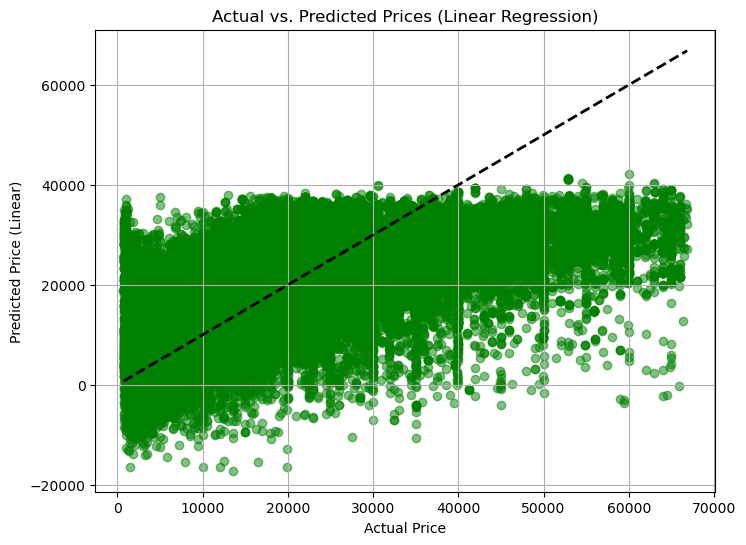

In [33]:
# Model2 : Linear regression 

# Create and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions on test set
y_pred_linear = linear_reg.predict(X_test)

# Model evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear:.2f}, MAE: {mae_linear:.2f}, R2 Score: {r2_linear:.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='g', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Linear)")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.grid(True)
plt.show()


Lasso Regression - Best Alpha: 0.10, MSE: 91693197.13, MAE: 7252.78, R2 Score: 0.45


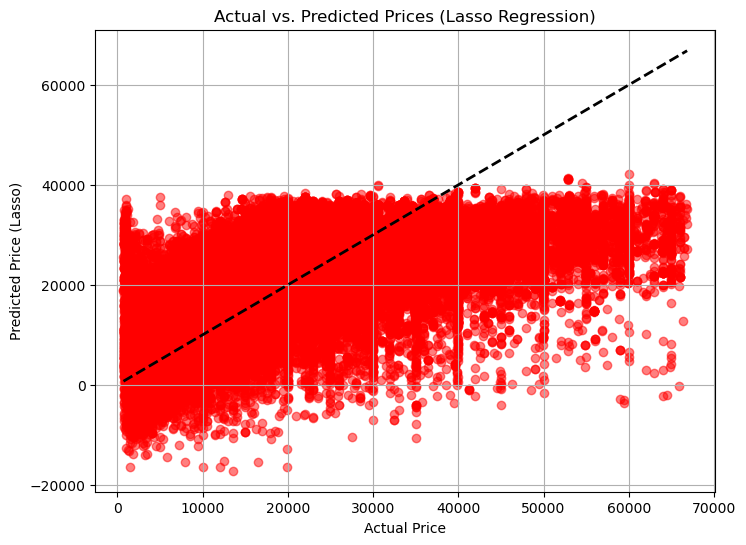

In [34]:
# Model3 : Using LASSO regression model 

# Create and fit the Lasso regression model
lasso = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
lasso.fit(X_train, y_train)

# Get best alpha (regularization parameter)
best_alpha_lasso = lasso.alpha_

# Predictions on test set
y_pred_lasso = lasso.predict(X_test)

# Model evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - Best Alpha: {best_alpha_lasso:.2f}, MSE: {mse_lasso:.2f}, MAE: {mae_lasso:.2f}, R2 Score: {r2_lasso:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='r', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Lasso)")
plt.title("Actual vs. Predicted Prices (Lasso Regression)")
plt.grid(True)
plt.show()

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It’s robust, handles non-linear relationships, and can capture interactions between features.

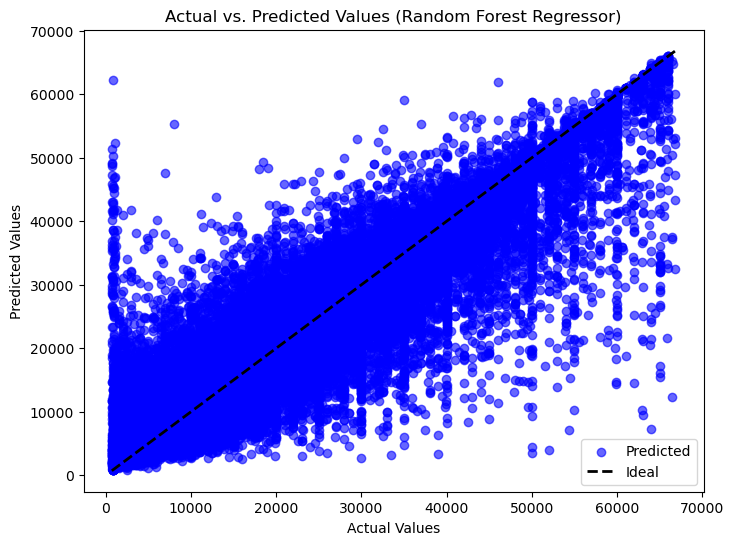

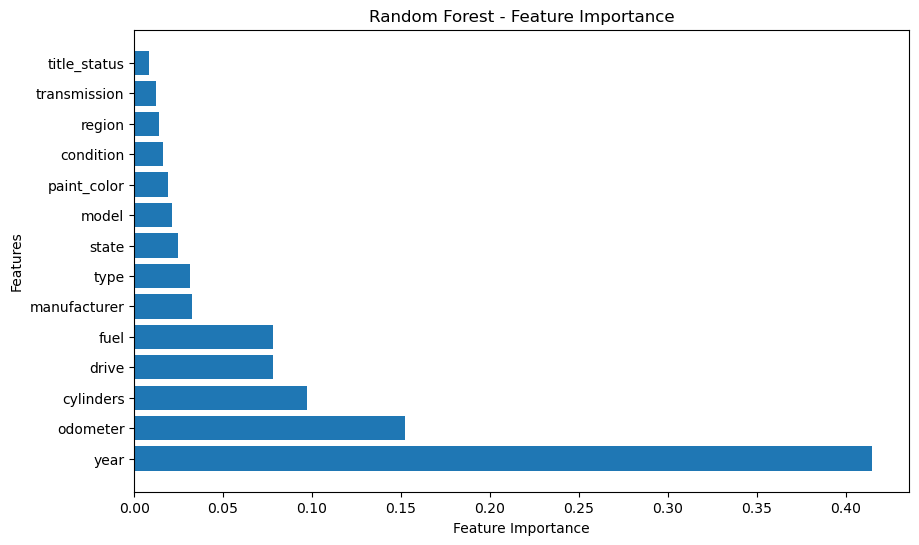

Random Forest Regression - MSE: 16989447.54, MAE: 2152.82, R2: 0.90


In [35]:
# model4: Using Random forest regressor
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='b', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.legend()
plt.show()

# Get feature importances
importances_rf = rf_model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_rf})

# Sort features by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importance')
plt.show()

print(f"Random Forest Regression - MSE: {mse_rf:.2f}, MAE: {mae_rf:.2f}, R2: {r2_rf:.2f}")

**GridSearchCV** is a powerful technique for hyperparameter tuning in machine learning models. It systematically searches through a specified hyperparameter space to find the best combination of hyperparameters that optimizes the model’s performance.
* use grid search with cross-validation to find the best hyperparameters for the random forest regressor model

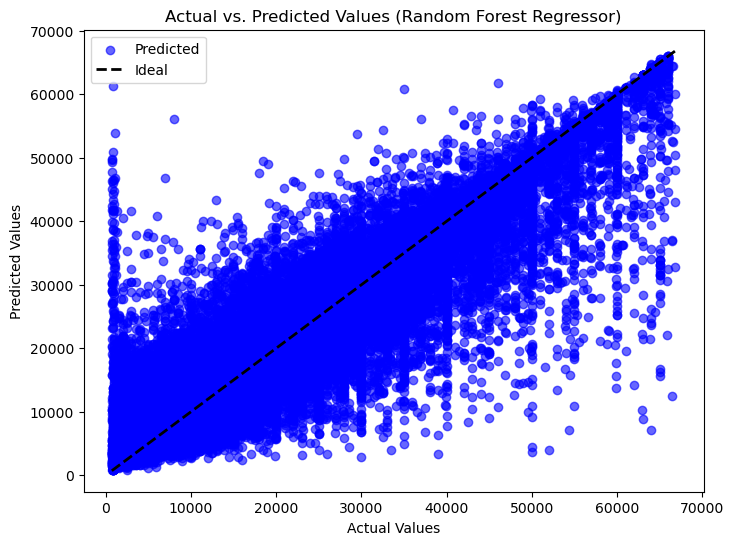

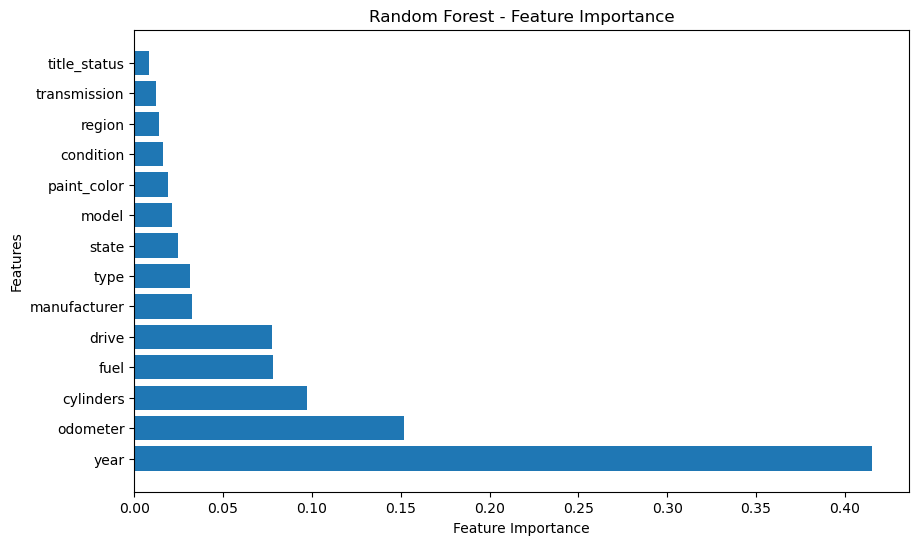

Best Random Forest Regression - MSE: 16860597.56, MAE: 2142.32, R2: 0.90
Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
# model4a: Using Random forest regressor + GSCV
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)

# Define the hyperparameters you want to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the grid search with your model and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# plotting the actual vs predicted model results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.6, color='b', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.legend()
plt.show()

# Get feature importances
importances_rf = best_rf_model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_rf})

# Sort features by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importance')
plt.show()

print(f"Best Random Forest Regression - MSE: {mse_best_rf:.2f}, MAE: {mae_best_rf:.2f}, R2: {r2_best_rf:.2f}")
print(f"Best hyperparameters: {best_params}")

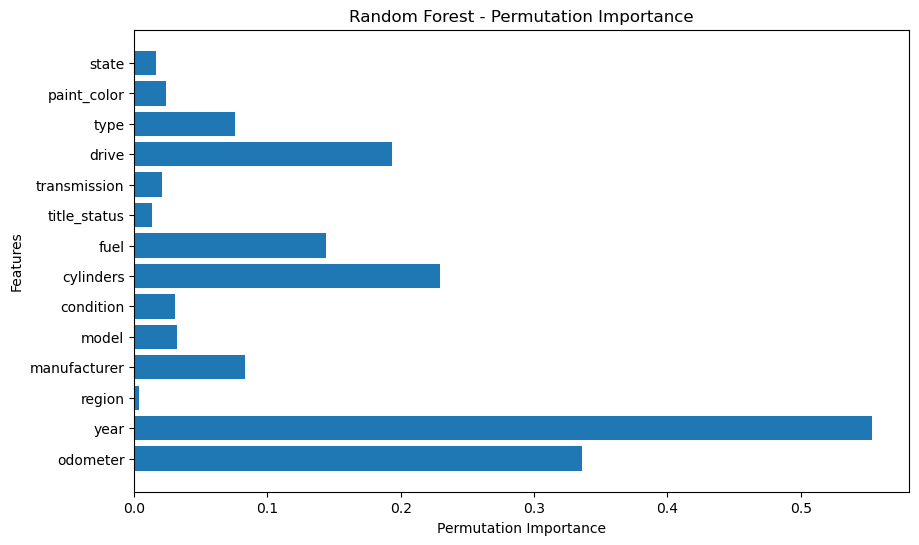

In [40]:
# Compute permutation importance
perm_importance_rf = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=1)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, perm_importance_rf.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Random Forest - Permutation Importance')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



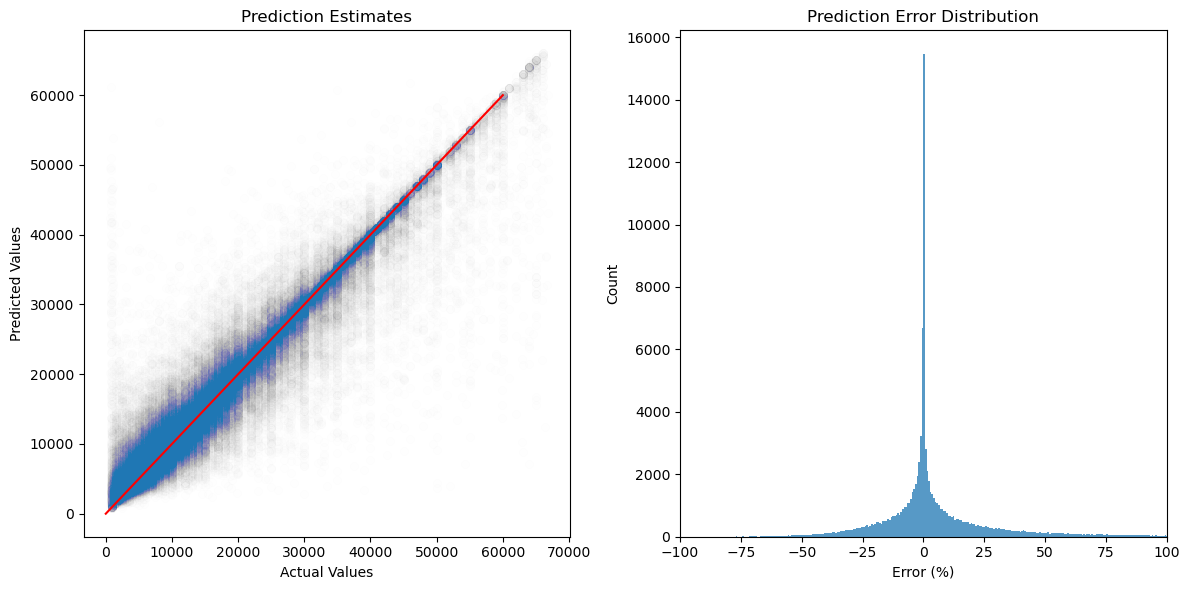

In [41]:
# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for prediction estimates
axs[0].scatter(y_test, y_pred_best_rf, alpha=0.005)
axs[0].plot([0, 60000], [0, 60000], 'r-')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Prediction Estimates')

# Histogram for prediction errors
err = (y_pred_best_rf - y_test) / y_test * 100
sns.histplot(err, ax=axs[1])
axs[1].set_xlabel('Error (%)')
axs[1].set_xlim(-100, 100)
axs[1].set_title('Prediction Error Distribution')

plt.tight_layout()
plt.show()

**Extreme Gradient Boosting:** XGBoost is a powerful gradient boosting algorithm that performs well in various regression tasks. It’s particularly useful for handling complex relationships and feature importance

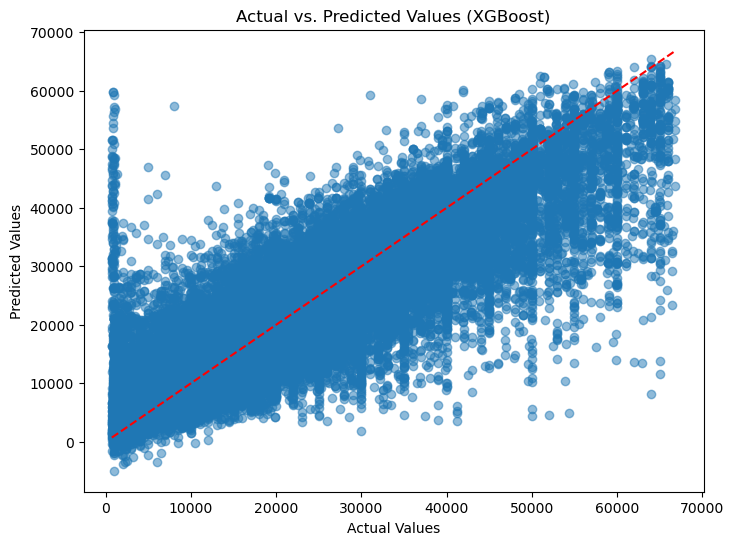

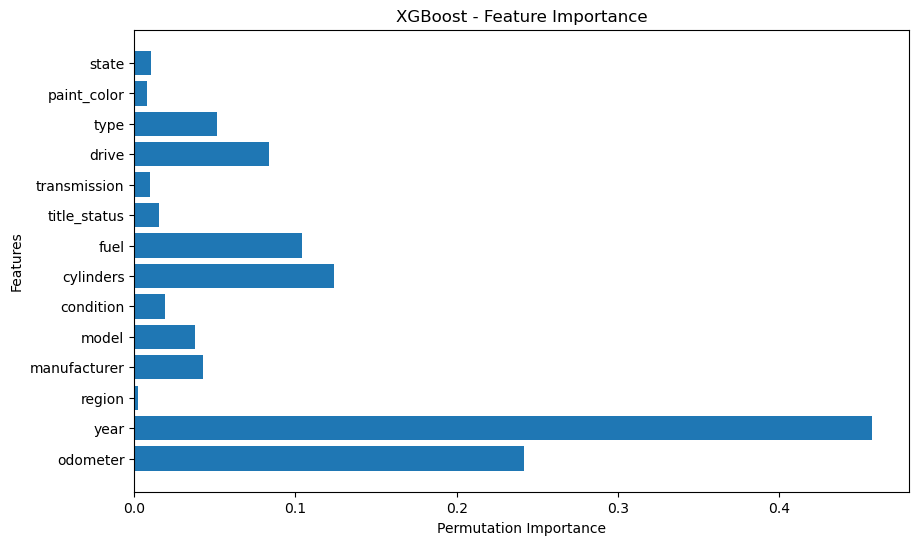

Model using XGBOOST Regressor - MSE: 28778847.82, MAE: 3529.67, R2: 0.83


In [42]:
# model5: using XGBoost 
# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, random_state=1)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Create a scatter plot of actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.show()

# Compute permutation importance
perm_importance_xgb = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=1)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, perm_importance_xgb.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('XGBoost - Feature Importance')
plt.show()
print(f"Model using XGBOOST Regressor - MSE: {mse_xgb:.2f}, MAE: {mae_xgb:.2f}, R2: {r2_xgb:.2f}")


**Light Gradient Boosting algorithm:** Unlike traditional gradient boosting algorithms that grow trees in a level-wise manner, LightGBM uses a leaf-wise approach. This means it grows the tree by splitting the leaf with the maximum reduction in loss, resulting in faster convergence and better performance.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 246584, number of used features: 14
[LightGBM] [Info] Start training from score 18324.915449


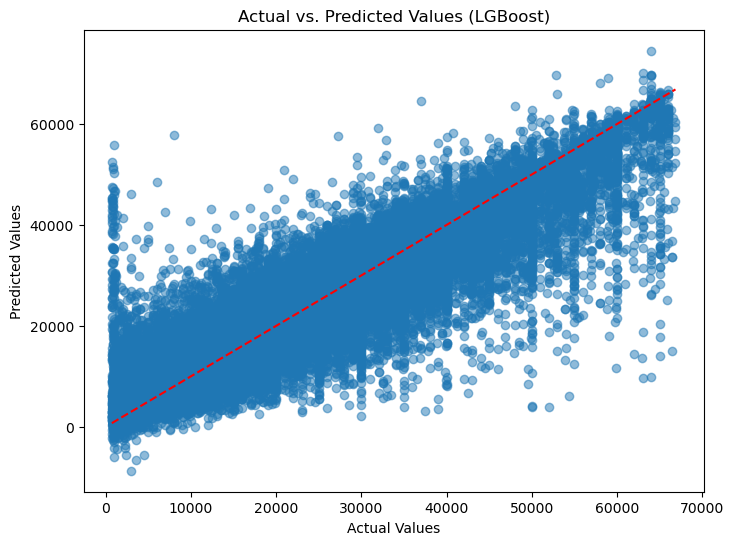

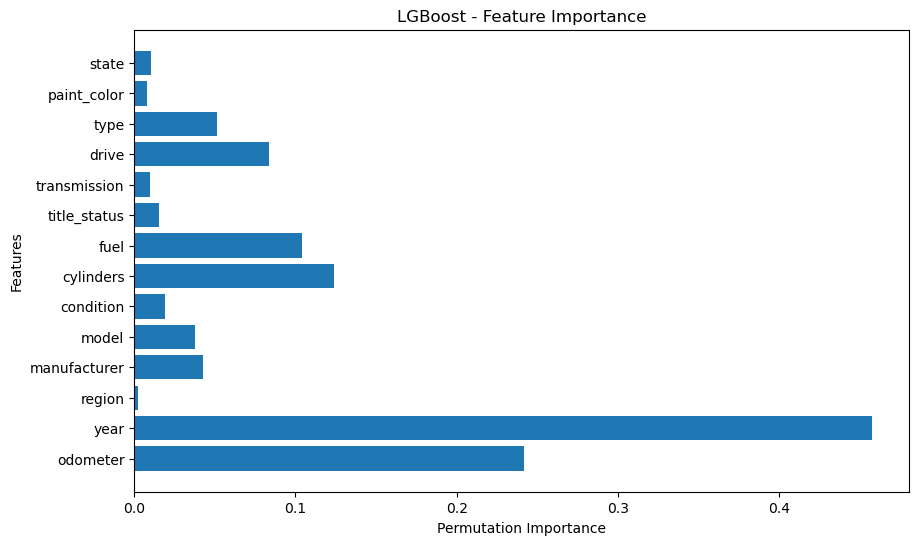

Model using LGBOOST Regressor - MSE: 19173104.70, MAE: 2705.10, R2: 0.89


In [48]:
# model6: using LGBoost 
# Initialize the model
lgbm_model = LGBMRegressor(
    boosting_type='gbdt',  # Gradient boosting type
    num_leaves=64,         # Maximum number of leaves
    learning_rate=0.2,    # Boosting learning rate
    n_estimators=1000       # Number of boosted trees
)

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgbm_model.predict(X_test)

# Evaluation Metrics
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Create a scatter plot of actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (LGBoost)')
plt.show()

# Compute permutation importance
perm_importance_xgb = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=1)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, perm_importance_xgb.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('LGBoost - Feature Importance')
plt.show()
print(f"Model using LGBOOST Regressor - MSE: {mse_lgb:.2f}, MAE: {mae_lgb:.2f}, R2: {r2_lgb:.2f}")



**Create a test sample dataframe to test the model for pricing**

In [49]:
# Create a new test DF with values (encoded) to predict the price that a used car showroom can use 
data = {
    'odometer': [-0.552042],
    'year': [0.379800],
    'region': [34],
    'manufacturer': [9],
    'model': [32],
    'condition': [2],
    'cylinders': [5],
    'fuel': [2],
    'title_status': [0],
    'transmission': [3],
    'drive': [2],
    'type': [10],
    'paint_color': [9],
    'state': [22]
}

df_test = pd.DataFrame(data)
print(df_test)

# Predict te price 
y_ucp = best_rf_model.predict(df_test)
print(y_ucp)

   odometer    year  region  manufacturer  model  condition  cylinders  fuel  \
0 -0.552042  0.3798      34             9     32          2          5     2   

   title_status  transmission  drive  type  paint_color  state  
0             0             3      2    10            9     22  
[16780.96]


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Analysis of Factors Influencing Used Car Prices**

**Objective**
The primary goal of our data analysis was to identify the key factors influencing used car prices. By understanding what makes a car more or less expensive, we aimed to provide clear recommendations to our client for fine-tuning their inventory.

**Best Model Selection:**
* The Random Forest Regression model with hyperparameter tuning using GridSearchCV emerged as the best choice among the six models tested.
* The selected hyperparameters (e.g., max_depth, min_samples_split, and n_estimators) contribute to achieving the lowest error estimators (mean squared error, mean absolute error, and R2 score).
   * Notably, the selected hyperparameters were:
       * max_depth: None
       * min_samples_split: 2
       * n_estimators: 200
* An R2 score of 0.90 indicates that your model captures around 90% of the variance in used car prices, which is quite promising.
* The prediction estimates provide a nice correlation between the actual and predicted values and the Error has a normal distribution, centered around the mean $$(\mu = 0)$$

**Feature Importance:**
* The key features that significantly influence used car prices, according to the Random Forest model, include:
   * “fuel,” “manufacturer,” “type,” “cylinders,” “drive,” “year,” and “odometer.”
* These features align with what customers value when purchasing a used car, and the permutation importance confirms their impact.

**Other Observations:**
* Odometer reading and year of manufacture strongly correlate with price, as expected.
* Specific attributes, such as trucks (e.g., RAM), high-cylinder engines, diesel vehicles, and electric cars, impact price margins.

**Data Cleanup and Challenges:**
* Handling null values and ensuring a cleaner dataset are essential steps. While some nulls were dropped, further improvements could enhance prediction accuracy.
* Mismatched fields (e.g., inconsistent values) may stem from input data quality. Ideally, starting with clean data would yield better results.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

**Abstract**
Our analysis aims to provide valuable insights for used car dealers seeking to fine-tune their inventory. By understanding customer preferences and the factors influencing used car prices, we can optimize stock selection and pricing strategies.

**Key Findings**

**1. Best Model Selection**
* After evaluating six models, the Random Forest Regression model with hyperparameter tuning using GridSearchCV emerged as the top performer.
* Selected hyperparameters:
  * max_depth: None
  * min_samples_split: 2
  * n_estimators: 200
* An impressive R2 score of 0.90 indicates that our model captures approximately 90% of the variance in used car prices.

**2. Feature Importance**
* The following features significantly influence used car prices:
  * **Fuel type**: Customers show preferences for specific fuel types (e.g., gas, diesel, electric).
  * **Manufacturer**: Brand reputation impacts pricing.
  * **Car type**: Sedans, SUVs, and trucks have varying price ranges.
  * **Number of cylinders**: High-cylinder engines affect prices.
  * **Drive type**: All-wheel drive (AWD) or front-wheel drive (FWD) matters.
  * **Year of manufacture**: Newer cars tend to command higher prices.
  * **Odometer reading**: Mileage directly impacts value.

**3. Other Observations**
* **Odometer and Year**: As expected, odometer reading and year of manufacture strongly correlate with price. Low mileage and recent models are desirable.
* **Specific Attributes**: Certain attributes affect price margins:
  * Trucks (e.g., RAM) tend to be pricier.
  * High-cylinder engines may increase costs.
  * Diesel vehicles and electric cars have distinct pricing patterns.

**4. Recommendations** 
* **Inventory Selection**:
  * Stock popular brands and models based on customer preferences.
  * Prioritize low-mileage, newer vehicles.
  * Consider offering a mix of fuel types to cater to diverse buyers.
* **Pricing Strategies**:
  * Adjust prices based on features (e.g., AWD, cylinders).
  * Highlight unique attributes (e.g., electric drivetrain) to justify higher prices.
* **Data Quality**:
  * Continuously clean and update your dataset to improve prediction accuracy.
  * Address null values and inconsistencies.

Understanding customer preferences and aligning inventory with market demand will enhance customer success